# STA 130 Lab 3 - Probability
*Your Name Here*

**Instructions**: Complete all of the below prompts and problems. *Show your work!* For questions asking you to calculate the probability function and format in a table, you may attach a scanned copy of your calculations if you do not wish to typeset them all in Markdown.

## The Game of Craps

The game of craps is played with two dice.  On the first roll:
- You lose if you get a total of 2, 3, or 12
- You win if you get a total of 7 or 11
- Otherwise, the total becomes your “point”, and you continue to roll the dice

On your subsequent rolls:
- You win if you roll a total that matches your point before you roll a 7
- Otherwise, you lose by rolling a 7 before you match your point

## The Experiment
Form groups of two (or three, if needed), and play craps (to simulate dice rolling, use https://www.random.org/dice/ ).  Take turns being the “shooter” (dice roller/player), while the other person
is the house/casino that keeps the player honest.  Make sure each person plays 10 times, and record whether
they win or lose.  Based on your record, what is your probability of winning at craps?
Once you’re done, write your results on the board.  When everybody is finished, you should use the data
collected to make a more informed estimate for the probability of winning.

## The Theory

Next, work with your partner(s) to calculate the theoretical probability of winning at craps by answering the following questions: 
- Let $W$ be the event you win.  Let $T_i$ be the event that you get a total of $i$ on the first roll (the point),
for $i = 2, 3, . . . ,12$.

Are the  events
$ T_2, T_3, . . . , T_{12}$ mutually  exclusive and  collectively exhaustive (in the  sense that
their union is the whole sample space)?

<span style="color:red">
Yes. For example, if you roll a 3, you cannot also roll a 4... implies that events $T_i$ are mutually exclusive.

Complete the following equation using conditional probabilities:

$Pr(W) = \sum\limits_{i=2}^{12} Pr(W \cap T_i) = $

<span style="color:red">

$\sum\limits_{i=2}^{12} Pr(T_i)*Pr(W |T_i)$

Find the $Pr(T_i)$ for each $i$.  Recall, from your reading of DeGroot and Schervish, examples 1.65 and 1.73, the
number of ways that 2 dice can be rolled.  You might try problems 1.6.1 and 1.6.2 from the book for a
warm-up if you need it.

Total $i$ | Probability $Pr(T_i)$
------|-------------
$1$ | 
$2$ | 
$3$ | 
$4$ | 
$5$ | 
$6$ | 
$7$ | 
$8$ | 
$9$ | 
$10$ |
$11$ |
$12$ |

At this point, we need to evaluate whether we’ve already won or lost (recall from above:  2, 3, 12 =
lose; 7, 11 = win; 4, 5, 6, 8, 9, 10 = keep rolling).  What are the conditional probabilities of winning,
$Pr(W | T_i)$?

It may help here to first consider an example.  Let’s say we have a point of 4.
- What are the rolls that will stop play?
- Which of those rolls will result in a win?
- So the probability of winning given a point of 4 is **____** .

Total $i$ | Probability $Pr(W|T_i)$
------|-------------
$1$ | 
$2$ |
$3$ |
$4$ |
$5$ |
$6$ |
$7$ |
$8$ |
$9$ |
$10$ |
$11$ |
$12$ |

Now  use  the  equation  you  developed  above  with  the  tables  you  just  filled  out  to  find  the  total
probability of winning at craps:

<span style="color:red">
$Pr(W) = \sum\limits_{i=2}^{12} Pr(W \cap T_i) = \sum\limits_{i=2}^{12} Pr(T_i)*Pr(W |T_i)$

In [23]:
import numpy as np
pr_Ti = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]) # probability of each event
pr_W_given_Ti = np.array([0,0,1/3,2/5,5/11,1,5/11,2/5,1/3,1,0]) # probability of winning given a particular event occurs
pr_win = np.round(np.sum(pr_Ti*pr_W_given_Ti),3) # probability of winning the game
pr_win

0.493

In [20]:
# notice that pr_Ti sums to 1, but pr_W_given_Ti does not need to
np.sum(pr_Ti)

1.0

## The Simulation

Develop a Python function to simulate a game of craps and record whether you win or lose.  Simulate 1,000 games and use the outcomes to estimate the probability of winning. Run this simulation 1,000 times and find the mean and variance of your estimate of $Pr(Win)$.

Make a histogram of your 1000 simulated estimates of $Pr(Win)$.  Compare these to your experimental and
theoretical estimates by adding a vertical line to the histogram for each of these.

Write a brief discussion of your results:  
- Which method of finding the probability of winning do you trust more? Why?
- What are the pros and cons of each method?  
- Is craps a fair game (i.e. does neither party, house or player, have an advantage)?

Hint: Python's scientific computing library, `SciPy`, will be very helpful. Use the `random` module to simulate rolling two die. Functionalizing your simulation will also be cleaner and more efficient.

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set random seed for reproducibility
sp.random.seed(seed = 11561)

In [3]:
def crap_roll(n_rolls):
    """
    This function simulates rolling a pair of fair dice in the game of craps using
    the multinomial distribution. It returns the total for each roll. 
    """
    # make random draws from multinomial dist - equivalent to rolling a dice
    roll = sp.random.multinomial(n_rolls, (1/6,1/6,1/6,1/6,1/6,1/6), size = 2)
    values = (1, 2, 3, 4, 5, 6)
    return sum(sum(roll*values))

In [4]:
def crap(n):
    """
    This function simulates n rounds of the game of craps. It ouputs a n x 2 matrix
    where each row is the outcome of a game and whether the player won or lost.
    In column 2, 1 denotes a win and 0 denotes a loss. 
    """
    crap_results = np.zeros((n,2)) # pre-allocate memory for results
    for i in range(n):
        outcome = crap_roll(1) # first roll
        if outcome in (7, 11):
            crap_results[i,] = (outcome, 1) # win
        elif outcome in (2, 3, 12):
            crap_results[i,] = (outcome, 0) # lose
        else:
            point = outcome
            while outcome != 7:
                outcome = crap_roll(1)
                if outcome == point:
                    crap_results[i,] = (outcome, 1) # win
                    break
            if outcome == 7:
                crap_results[i,] = (outcome, 0) # lose  
    return crap_results

In [5]:
n_sim = 10**3
crap_simulation = np.zeros((n_sim, 1))
for sim in range(n_sim):
    crap_simulation[sim] = np.mean(crap(n = 10**3), axis = 0)[1]

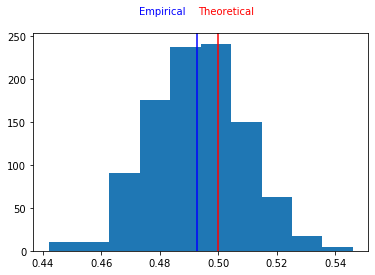

In [22]:
plt.hist(crap_simulation)
plt.axvline(x = np.mean(crap_simulation), color = "b") # empirical mean
plt.text(x = np.mean(crap_simulation) - 0.02, y = 275, s = "Empirical", color = "b")
plt.axvline(x = 0.5, color = "r") # theoretical mean - currently fill in - calculate actual value and replace
plt.text(x = pr_win, y = 275, s = "Theoretical", color = "r")
pass